# The Art of Scientific Python
## Juan Nunez-Iglesias, Stefan vander Walt, and Harriet Dashnow

## Table of Contents

1. Elegant NumPy: The foundation of Scientiic Python
    
    a. Introduction to Data
    
    b. NumPy N-Dimensional Arrays
        
            i. Why use __ndarrays__ instead of Lists
        
            ii. Vectorization
        
            iii. Broadcasting
    
    c. Exploring gene Expressio Dataset
        
        i. Readding the Data with Python
    
    d. Normalization
        
            i. Between Samples

            ii. Between genes

            iii. NNormalizing Over Sampels and Genes: RPKM

2. Quantile Normalization with NumPy and SciPy
    
    a. Getting Data
    
    b. Geen Expression Distribution: Distribution Between Individuals
    
    c. Biclulstering the Count Data
    
    d. Visualizing Clusters
    
    e. Predicting Survival
        
            i. Furhter Work Using TCGA's Patient Clusters
        
            ii. Further Work Reproducing the TCGA's Clusters

3. Networks of Image regoins with ndimage

    a. Imges Are Just Numbers
    
            i. Excercise: Adding a Grid Overlay
    
    b. Filters In Signal Processing

    c. Filtering Image (2D Filters)

    d. generic Filters: Arbitarry Functions of Neighbourhood Values

            i. excercise: Convay's Game of Life

            ii. Excercise: Sobel gradient Magnitude

    e. Graph and Network Library

            i. Curve Fitting with SciPy

    e. Region Adjecency Graphs

    f. Elegant ndimage: How to Built Graphs from Imae Regoins

    g. Putting It All Together: Mean Color Segmentation

4. Frequensty and Fast Fourietr Transform

        a. Introducing Frequency

        b. Illustrations: A Birdsong Spectrogram

        c. History

        e. Implementatins

        f. Choosing the Length of a DFT

        g. More DFT Concepts

                i. Frequency and Their Ordering

                ii. Windowing

        f. Real-World Application: Analysing Radar Data

                i. Signal Properties in Frequency Domain
            
                ii. Windowing Applied
            
                iii. Radar Images

                iv. Further Applications of FFT

                v. Excercise: Image Convolution
    
    5. Contingency Table Using Sparce Coordinate Matrices

        a. Contengency Table

                i. Excercise Computational Complexcity of Confussion Matrices

                ii. 
            

In [100]:
# Imports for chapter one
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

## Elegant NumPy: The Foundations of Scientific Python

### Exploring a Geene Expression Data Set 

In [97]:
elegantStyle = "../resources/repositories/elegant_scipy_actual/notebooks/style/elegant.mplstyle"
plt.style.use(elegantStyle)

Genes in data_table:  20500
Genes in gene_info:  20503
20500 genes measured in 375 individuals.
Count statistics:
 min: 6231205
 mean: 52995255.33866667
 max: 103219262


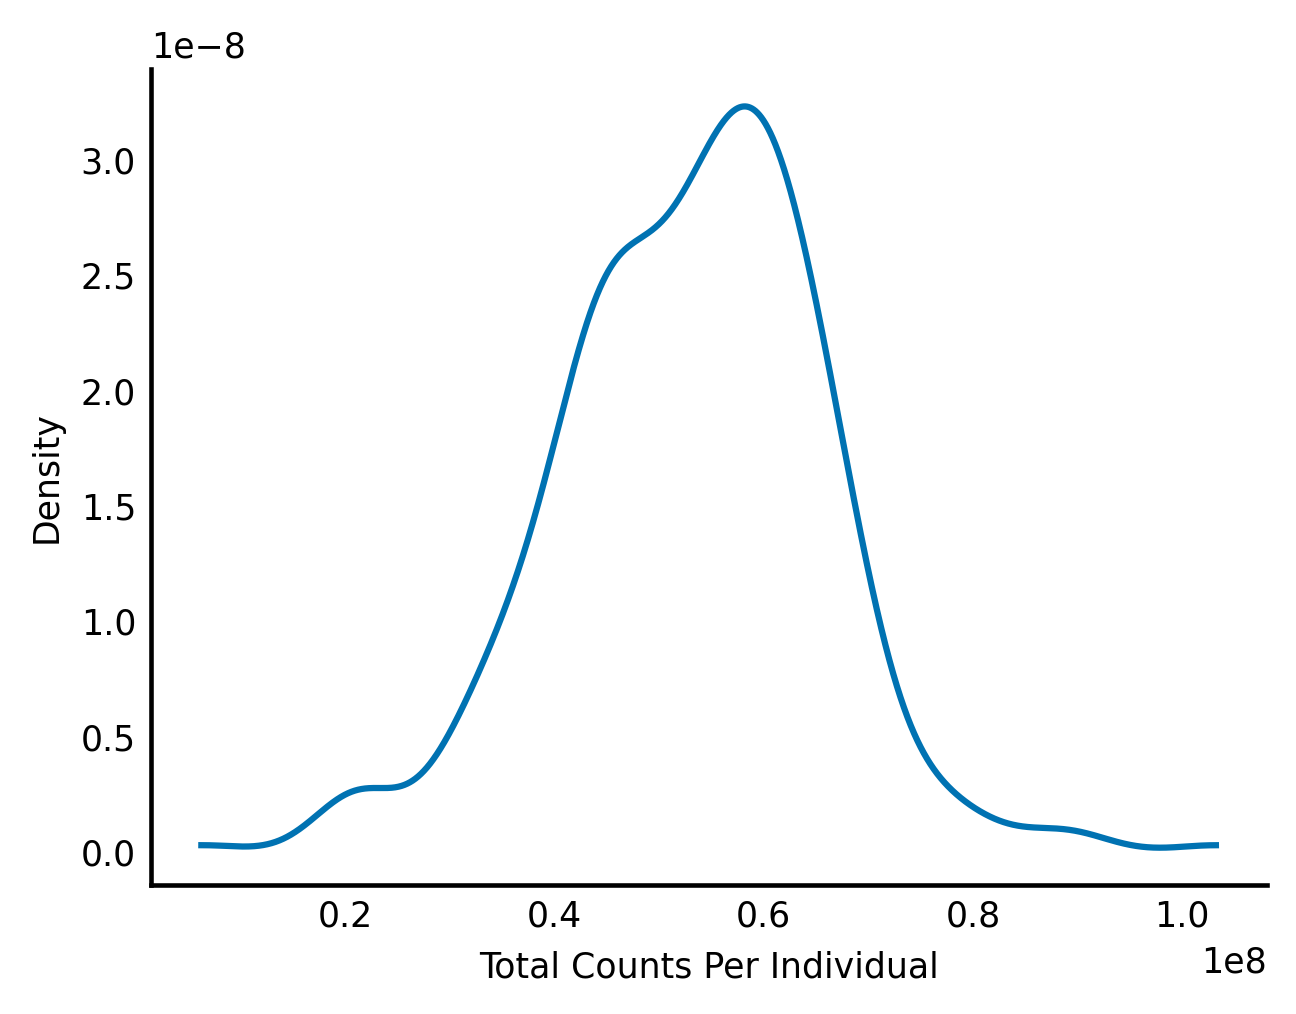

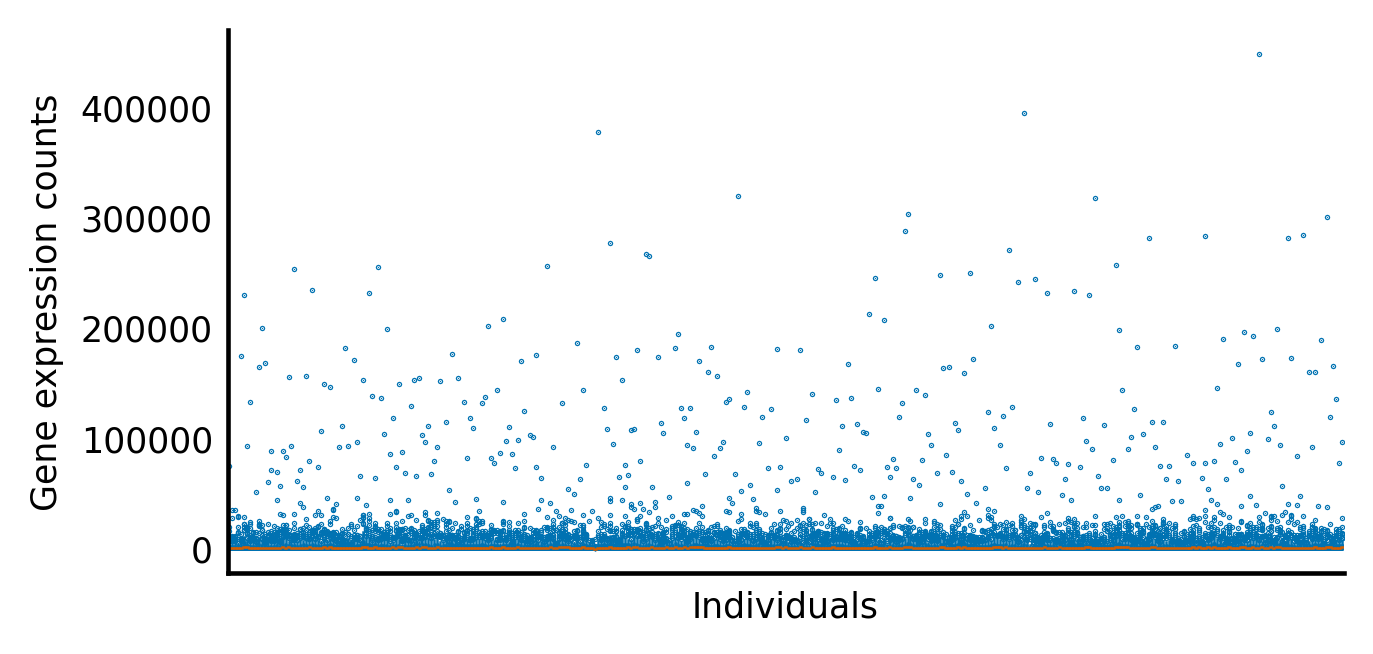

In [130]:
# Getting the raw data

geneExperimentLocation = "../resources/repositories/elegant_scipy_actual/notebooks/data/counts.txt"
# Each colum represent an individual, each row represents a gene type, and a value is the number of genes of a kind found in an individual
geneExperiment = pd.read_csv(geneExperimentLocation, index_col=0)

geneInformationLocation = "../resources/repositories/elegant_scipy_actual/notebooks/data/genes.csv"
geneInformation = pd.read_csv(geneInformationLocation, index_col=0)

print("Genes in data_table: ", geneExperiment.shape[0])
print("Genes in gene_info: ", geneInformation.shape[0])

# Find the macthing indices in the two datasets
matchedIndex = pd.Index.intersection(geneInformation.index, geneExperiment.index)

# Numpy arary containing expression counts for each gene in each individual
counts = np.asarray(geneExperiment.loc[matchedIndex], dtype="i8")
gene_names = np.array(matchedIndex)

# Check how many genes and individuals were measured
print(f'{counts.shape[0]} genes measured in {counts.shape[1]} individuals.')

# Length of each gene
geneLengths = np.asarray(geneInformation.loc[matchedIndex]["GeneLength"], dtype="i8")

totalCounts = np.sum(counts, axis=0)

# Use Gaussian smoothing to estimate the density
density = stats.gaussian_kde(totalCounts)

# Make values for with to etimate the density for potting
x = np.arange(np.min(totalCounts), np.max(totalCounts), 10000)

# Make the density plot
fig, ax = plt.subplots()
ax.plot(x, density(x))
ax.set_xlabel("Total Counts Per Individual")
ax.set_ylabel("Density")

print(f"Count statistics:\n min: {np.min(totalCounts)}"
      f"\n mean: {np.mean(totalCounts)}"
      f"\n max: {np.max(totalCounts)}")

# Bar plot of expression counts by individual
fig, ax = plt.subplots(figsize=(4.8, 2.4))

with plt.style.context("../resources/repositories/elegant_scipy_actual/notebooks/style/thinner.mplstyle"):
        ax.boxplot(countsSubset)
        ax.set_xlabel("Individuals")
        ax.set_ylabel("Gene expression counts")
        reduceXaxisLabel(ax, 5)

In [126]:
def reduce_xaxis_labels(ax, factor):
    """Show only every ith label to prevent crowding on x-axis
    e.g. factor = 2 would plot every second x-axis label,
    starting at the first.
    Parameters
    ----------
    ax : matplotlib plot axis to be adjusted
    factor : int, factor to reduce the number of x-axis labels by
    """
    plt.setp(ax.xaxis.get_ticklabels(), visible=False)
    for label in ax.xaxis.get_ticklabels()[factor-1::factor]:
        label.set_visible(True)


In [117]:
# Subset data for plotting

# Set seed to get consistent reproducible result
np.random.seed(seed = 7)
samplesIndex = np.random.choice(range(counts.shape[1]), size = 70, replace = False)
countsSubset = counts[samplesIndex]

# Some custom x axis labeling to make our plot easier to read
def reduceXaxisLabel(ax, factor):
    """
    Show only every ith x-axis label to pervent crowding on x-axis, e.g.factor = 2, would plot only every second x-axis label, starting at the first.

    Parameters
    ----------------------------------
    ax: matplotlib plot axis to be adjusted
    factor: int, factor to reduce the number of x-axis labels
    """
    plt.setp(ax.xaxis.get_ticklabels(), visible=False)
    for label in ax.xaxis.get_ticklabels()[factor-1::factor]:
        label.set_visile(True)
 

(375,)